In [35]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10  
from keras.models import Sequential  

from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils

In [36]:
# Het inladen van de data in train en testset.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
X_train = x_train.astype(np.float32)
X_test = x_test.astype(np.float32)

In [37]:
# De shapes van het de train en testset. 
# De x_train set bevat 50000 foto's met een afmeting van 32 bij 32 pixels. Het aantal kleurkanalen wat de foto heeft is 3, rood groen blauw.
# de y_train set bevat dezelfde 50000 foto's. De 1 staat voor de lengte die elke outputs de neurons kunnen hebben. 0 t/m 9. deze cijfers staan voor de classes die de dataset bevat.
# x_test en y_test visa versa met x_train & y_train. Alleen deze batch met data wordt gebruik om te verifiëren. 
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
x_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


In [38]:
# Normaliseren van de pixels door ze te delen door 255. 
X_train /= 255
X_test /= 255

In [39]:
# Door de functie 'to_categorical' kunnen we het aantal output neuronen definieëren.
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

Convolutioneel neuraal netwerk
Het model heeft 3 convolutionele lagen. Hierin worden eerst patronen herkent. De tweede laag kan deze patronen bij elkaar vinden en zo onderdelen herkennen van een class. Vervolgens zou het netwerk gehele objecten kunnen herkennen bij de derde laag. De laatste 2 lagen zijn normale lagen. Deze twee lagen zorgen ervoor dat het netwerk een class kan terug geven als output en het een fully connected  

- Ik bouw op met aantal filters. Dat doe ik om zo grotere combinaties van patronen te kunnen herkennen na mate we door de layers heen computeren.
- Als padding wordt 'same' gebruikt om zo ook aan de randen en hoeken ook patronen te kunnen herkennen.
- Bij iedere laag wordt een dropout gebruikt van 0.25. Dit zorgt ervoor dat het model niet overfit. Dit is handig omdat dan de data steeds zo random mogelijk is.
-De batchnormalization functie zorgt ervoor dat de inputs voor de volgende laag genormaliseerd wordt. Op deze manier creëert het netwerk altijd activaties met eenzelfde verdeling van waardes. 
- Als activatie gebruik ik de 'Relu'. Deze vervangt alle negatieve getallen met 0. Dit zorgt ervoor dat berekeningen gemakkelijker gaan. Het wordt ook standaard gebruikt bij CNN. Bij de laatste laag gebruik ik softmax, dit zorgt ervoor dat de neuron met de hoogste kans op goede classificatie wordt gekozen als output.
- Maxpooling2d wordt gebruikt om de waardes die minder relevant zijn uit te filteren. Dit doe ik in alle CNN lagen.
- Na de 3e laag Conv2D wordt de Flatten() functie aangeroepen. Dit zet een drie demensionale matrix om in een vector wat leesbaar is voor de normale layers.

In [40]:
# Initialiseren van het netwerk
model = Sequential()

In [41]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=X_train.shape[1:], padding='same')) # padding same zodat de kernel ook in de hoeken patronen kan herkennen.
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))
model.add(BatchNormalization())

In [42]:
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))
model.add(BatchNormalization())

In [43]:
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))
model.add(BatchNormalization())

In [44]:
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))
model.add(BatchNormalization())

In [45]:
model.add(Flatten())
model.add(Dropout(.25))

In [46]:
model.add(Dense(256))#, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(.25))
model.add(BatchNormalization())

In [47]:
model.add(Dense(128))#, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(.25))
model.add(BatchNormalization())

In [48]:
model.add(Dense(10))
model.add(Activation('softmax'))

compile
- Voor de lossfunction gebruiken we categorical_crossentropy, want ik maak gebruik hier van classificatie van de data.
- Als optimizer gebruik ik adam. Deze schijnt erg goed te werken voor clasificatie bij CNN. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7407771/

In [49]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_14 (Activation)   (None, 16, 16, 64)        0         
__________

In [51]:
results = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 122s - loss: 1.8013 - acc: 0.3471 - val_loss: 2.0249 - val_acc: 0.3298
Epoch 2/15
50000/50000 [==============================] - 112s - loss: 1.3714 - acc: 0.5009 - val_loss: 1.3166 - val_acc: 0.5444
Epoch 3/15
50000/50000 [==============================] - 115s - loss: 1.1953 - acc: 0.5726 - val_loss: 1.2040 - val_acc: 0.5714
Epoch 4/15
50000/50000 [==============================] - 120s - loss: 1.0787 - acc: 0.6169 - val_loss: 0.9651 - val_acc: 0.6658
Epoch 5/15
50000/50000 [==============================] - 108s - loss: 0.9913 - acc: 0.6526 - val_loss: 0.8675 - val_acc: 0.6930
Epoch 6/15
50000/50000 [==============================] - 115s - loss: 0.9367 - acc: 0.6714 - val_loss: 0.8661 - val_acc: 0.6904
Epoch 7/15
50000/50000 [==============================] - 111s - loss: 0.8911 - acc: 0.6886 - val_loss: 0.7692 - val_acc: 0.7305
Epoch 8/15
50000/50000 [=======================

In [52]:
# Hieronder wordt het CNN model gevalideerd met de testdata.
result_accuracy = model.evaluate(X_test, y_test)
print('/n')
print(f'De accuratesse van het model is {result_accuracy[1]*100}.')
print(f'De loss van het model is {result_accuracy[0]}.')

 9920/10000 [============================>.] - ETA: 0s/n
De accuratesse van het model is 78.36999999999999.
De loss van het model is 0.6099209112644196.


Text(0.5, 1.0, 'Loss of the model over all epoch')

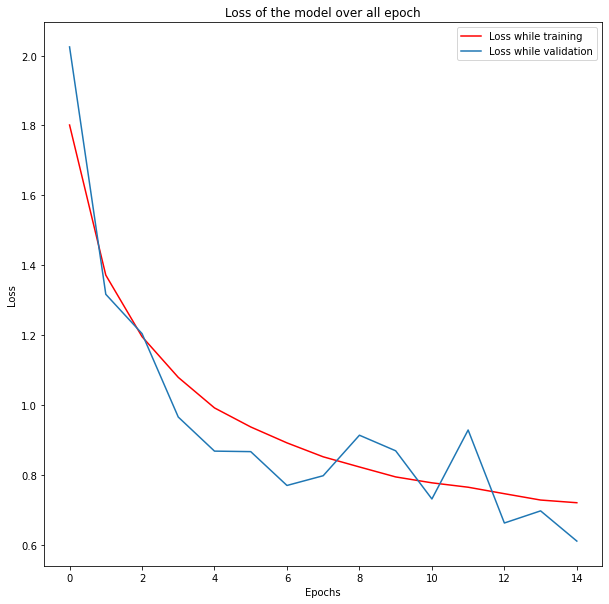

In [55]:
plt.figure(figsize=[10,10])
plt.plot(results.history['loss'], 'red')
plt.plot(results.history['val_loss'])
plt.legend(['Loss while training', 'Loss while validation'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss of the model over all epoch')

Text(0.5, 1.0, 'Accuracy moment of overfitting')

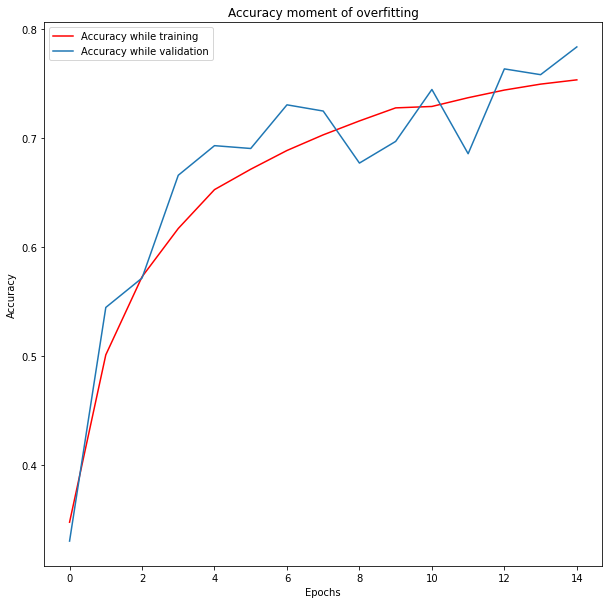

In [53]:
plt.figure(figsize=[10,10])
plt.plot(results.history['acc'], 'red')
plt.plot(results.history['val_acc'])
plt.legend(['Accuracy while training', 'Accuracy while validation'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy moment of overfitting')

# conclusie
Het model scoort aardig hoog, iets meer dan 78%. Dit wil dus zeggen dat hij in 78 van de 100 gevallen een object goed classificeert. Voor een eerste CNN model vind ik dat al aardig goed. Natuurlijk zal voor herkenning van objecten voor bedrijfsdoeleinden dit nog lang niet genoeg zijn. In de plot is te zien dat de lijnen telkens niet heel ver uit elkaar liggen. Dit betekend dat er geen overfitting plaats vindt. Dan zou de rode lijn ver boven de blauwe uitsteken wat accuratesse betreft.